In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # for plot styling
import numpy as np
import sklearn

data = pd.read_csv(r"C:\Users\Lenovo\Documents\INDE DATA\firstfulldatasetINDIA.csv")
#We make a copy of the file and work on it
data = data.copy()
data.head()


In [3]:
df = pd.read_csv(r'C:\Users\Lenovo\Documents\Ironhack\DATA\BreadBasket_DMS.csv')

In [4]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


## Goal: Cluster different customers of the Bakery

In [5]:
df['datetime'] = pd.to_datetime(df.Date + ' '+ df.Time)

In [9]:
df.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [10]:
df.drop(['Date','Time'], axis=1, inplace=True)

In [11]:
df.head()

,Transaction,Item,datetime
0,1,Bread,2016-10-30 09:58:11
1,2,Scandinavian,2016-10-30 10:05:34
2,2,Scandinavian,2016-10-30 10:05:34
3,3,Hot chocolate,2016-10-30 10:07:57
4,3,Jam,2016-10-30 10:07:57


In [12]:
df.Item.nunique()

95

In [13]:
df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [14]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']
other_food = [x for x in df.Item.unique() if x not in beverage 
                and x not in other and x not in kids and x not in snacks 
                and x not in bread and x not in breakfast_pastry 
                and x not in dessert and x not in condiments 
                and x not in breakfast and x not in lunch]

In [15]:
df['beverage'] = df.Item.isin(beverage).astype(int) #if berevage = 0, if not 1/ whick class of good was bought
df['other'] = df.Item.isin(other).astype(int)
df['kids'] = df.Item.isin(kids).astype(int)
df['snacks'] = df.Item.isin(snacks).astype(int)
df['bread'] = df.Item.isin(bread).astype(int)
df['breakfast_pastry'] = df.Item.isin(breakfast_pastry).astype(int)
df['breakfast'] = df.Item.isin(breakfast).astype(int)
df['dessert'] = df.Item.isin(dessert).astype(int)
df['condiments'] = df.Item.isin(condiments).astype(int)
df['lunch'] = df.Item.isin(lunch).astype(int)
df['other_food'] = df.Item.isin(other_food).astype(int)

In [16]:
df.head()

,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food
0,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0
1,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
2,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0,0
3,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0,0
4,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,1,0,0


In [71]:
df_group = df.groupby(['Transaction','datetime']).sum()
df_group 
df_group.reset_index(level='datetime', inplace=True)

In [79]:
df_group['hour']=df_group['datetime'].dt.hour
df_group['weekday']=df_group['datetime'].dt.day_name()

In [81]:
df_group['hour']


Transaction
1        9
2       10
3       10
4       10
5       10
        ..
9680    14
9681    14
9682    14
9683    14
9684    15
Name: hour, Length: 9531, dtype: int64

In [78]:
df_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour
Transaction,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,9
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,10
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0,10
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,10
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,10


In [20]:
df_group.weekday.value_counts()

Saturday     2068
Friday       1488
Sunday       1264
Thursday     1252
Tuesday      1203
Monday       1135
Wednesday    1121
Name: weekday, dtype: int64

<AxesSubplot:>

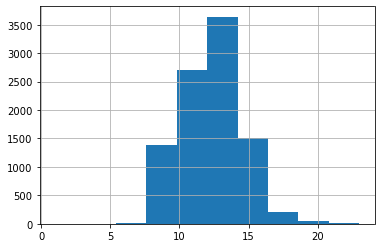

In [21]:
df_group.hour.hist()

In [22]:
df_group.datetime.dt.month.value_counts()

11    2154
3     1768
12    1696
2     1630
1     1598
4      510
10     175
Name: datetime, dtype: int64

In [23]:
df_group.drop('datetime', axis=1, inplace=True)


In [82]:
#data= les collones des items encodés + social caracteristiques pas encore encodés

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,0,9,Sunday
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,0,10,Sunday
3,2016-10-30 10:07:57,1,0,0,0,0,0,0,1,1,0,0,10,Sunday
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,0,10,Sunday
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,0,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2017-04-09 14:24:03,0,0,0,0,1,0,0,0,0,0,0,14,Sunday
9681,2017-04-09 14:30:09,1,1,0,0,0,0,0,1,0,0,1,14,Sunday
9682,2017-04-09 14:32:58,2,0,0,0,0,1,0,0,0,0,1,14,Sunday


In [24]:
#full data encodée, avec les non numeriques encodés
data_encoder = pd.get_dummies(data = data, columns=['religious'], drop_first=True).copy()

In [25]:
data_encoder.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Transaction,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0


# PCA

In [ ]:
#TOUTE LES COLLONES SONT ENCODEES (il y a des 0 et des 1, 2..)  dans chaque colunen - Y compris les religious, state, cast

In [33]:
from sklearn.decomposition import PCA

In [34]:
from sklearn.decomposition import PCA

pca = PCA(0.85)
pca.fit(data_encoder)
df_pca = pca.transform(data_encoder)
df_pca.shape

(9531, 5)

In [35]:
df_pca = pd.DataFrame(df_pca, columns = ['PC'+str(i) for i in range(1,6)]) #on choisit 5 PCA
df_pca

,PC1,PC2,PC3,PC4,PC5
0,3.198122,-0.927710,0.243533,0.006125,-0.180226
1,2.228594,-1.275378,1.181638,-0.161534,-0.078216
2,2.108349,0.423910,-0.218946,0.881109,-0.155497
3,2.199661,-0.581693,-0.785464,-0.027864,0.691540
4,2.207516,0.036358,0.441028,-0.333733,0.733569
...,...,...,...,...,...
9526,-1.790586,-1.099092,0.295625,-0.214565,-0.033516
9527,-1.888102,0.333721,-0.255261,0.648580,-0.154135
9528,-1.835226,1.158444,-0.210979,-0.567940,0.679837
9529,-1.811665,0.212644,-0.444985,-0.386764,0.778269


# Clustering


In [36]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

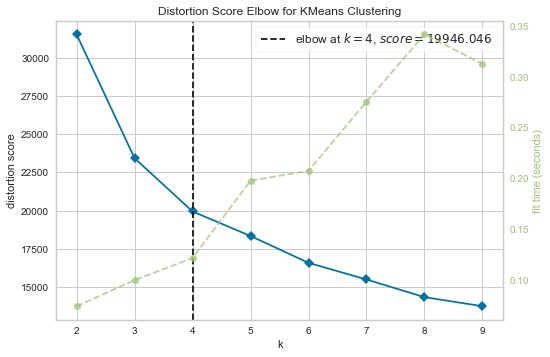

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10)) #k IS THE RANGE OF  number to my cluster, from 2 to 9
visualizer.fit(df_pca)
visualizer.poof()
#4 is the number of culster optimum

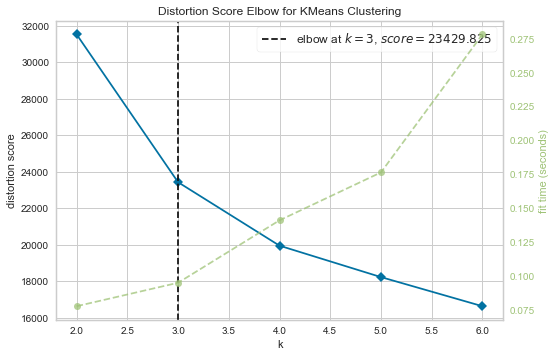

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,7))
visualizer.fit(df_pca)
visualizer.poof()

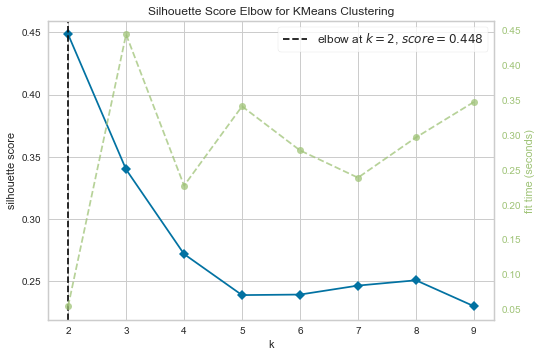

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10), metric='silhouette')
visualizer.fit(df_pca)
visualizer.poof()

In [50]:
model = KMeans(4) #5 from thr elbow model / EN FONCTION DES PCA/ ON DECIDE DE 4 CLUSTERS CHOISIS
model.fit(df_pca) #ON fIT 
y_pred = model.predict(df_pca)

In [51]:
y_pred #ON OBTIENT LES CLUSTERS/ CHAQUE LIGNE DE LA DATASET ENCODEES ET PCA (cad reduite) EST AFFECTE d'une cluster 
#( meme nombre de ligne d'idetntifiant mais chaque identifiant appartient à un cluster) 
#y-pred a le meme nombre de lignes que la dataset

array([3, 3, 3, ..., 0, 0, 2])

In [52]:
np.unique(y_pred, return_counts=True) # donner le combre de cluster soit4, LE NOMBRE DE CELLULE AFFECTE DANS CHAQUE CLUSTER

(array([0, 1, 2, 3]), array([2293, 2792, 1780, 2666], dtype=int64))

In [53]:
model.cluster_centers_  #LE MODEL DONNE LE CENTRE DES CLUSTER

array([[-1.34026230e+00,  1.02941170e-02, -3.34663776e-02,
        -2.75207599e-03, -6.56108718e-02],
       [ 6.78156407e-01,  1.32194725e-02,  5.64692074e-03,
        -1.04734909e-03, -2.41855883e-02],
       [-3.60463540e+00, -1.91779918e-02,  3.55274493e-02,
         5.34854248e-03,  6.27726570e-02],
       [ 2.84923473e+00, -9.89360548e-03, -8.50209567e-04,
        -1.07163065e-04,  3.98486730e-02]])

In [54]:
data_encoder['cluster'] = model.labels_  #c'est y-pred ( la longue colonne)

In [55]:
data_encoder.head()

,beverage,other,kids,snacks,bread,breakfast_pastry,breakfast,dessert,condiments,lunch,other_food,hour,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,cluster
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,0,9,0,0,1,0,0,0,3
2,0,0,0,0,2,0,0,0,0,0,0,10,0,0,1,0,0,0,3
3,1,0,0,0,0,0,0,1,1,0,0,10,0,0,1,0,0,0,3
4,0,0,0,0,0,1,0,0,0,0,0,10,0,0,1,0,0,0,3
5,1,0,0,0,1,1,0,0,0,0,0,10,0,0,1,0,0,0,3


In [87]:
data['cluster'] = model.labels_   #c'est y-pred ( la longue colonne)

In [88]:
import seaborn as sns

In [89]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='cluster', ylabel='weekday'>

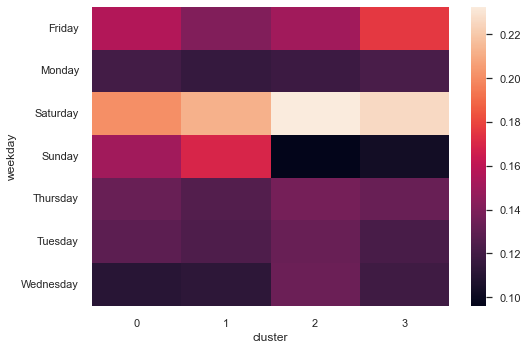

In [90]:
import seaborn as sns
sns.set()
sns.heatmap(pd.crosstab(data.SocialGroup, data.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

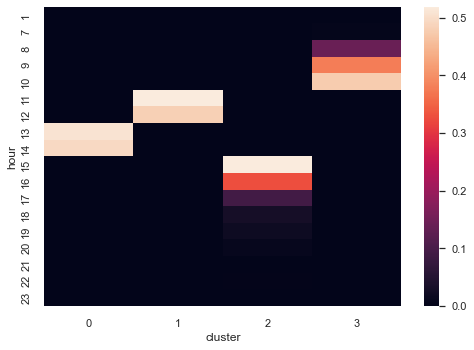

In [91]:
sns.heatmap(pd.crosstab(data.religion, data.cluster, normalize='columns'))

In [92]:
#CLASS1 SOMETIME TO SELLE BETWEEN 12 et 11... we check in the table .... label 1 and THE COLUMNS WHERE is 1 ( can be bread, coffee.)

In [93]:
# la grande table initiale avec le ID household (plusieurs items achetés, c'est le nombre de depense)

durable = datadurable[['ID', 'Item']]
durable

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
21288,9682,Coffee
21289,9682,Tea
21290,9683,Coffee
21291,9683,Pastry


In [97]:
#la petite table ou chaque itemp sont en colonne - on fait reset car data cluster est un array
clusters = data['cluster'].reset_index()
clusters

,Transaction,cluster
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
9526,9680,0
9527,9681,0
9528,9682,0
9529,9683,0


In [95]:
#On merge les deux tables, grace ID - merged est la grande table durable avec le cluster
merged = pd.merge(durable, clusters, on='ID')

In [66]:
#pour voir les caracteristiques du cluster.... on group par cluster applique sur la colonne item( grande table durable) ou par caracterique socioogique
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           23
         Bread            12
         Tea               8
         Sandwich          7
         Cake              6
1        Coffee           27
         Bread            16
         Tea               6
         NONE              5
         Cake              4
2        Coffee           23
         Bread            14
         Tea               9
         Cake              8
         Hot chocolate     5
3        Coffee           29
         Bread            20
         Pastry            8
         Medialuna         5
         Tea               5
Name: Item, dtype: int32

<AxesSubplot:xlabel='cluster', ylabel='hour'>

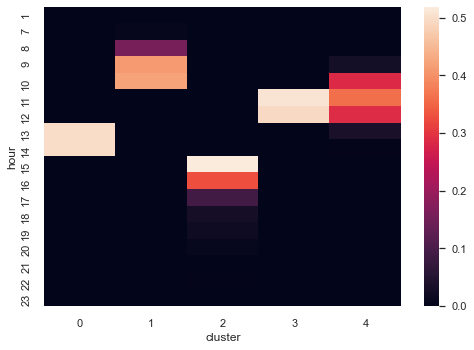

In [45]:
sns.heatmap(pd.crosstab(data.religion, data.cluster, normalize='columns'))

# Approach #2. Just KMeans


In [46]:
model = KMeans(5)
model.fit(data)
model.labels_

array([1, 4, 4, ..., 0, 0, 0])

In [47]:
#on cree un collone cluster
data.cluster = model.labels_

In [49]:
#on regarde le nombre de valeur dans chaque cluster
data.cluster.value_counts()

4    2712
2    2510
0    2054
1    1399
3     856
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='weekday'>

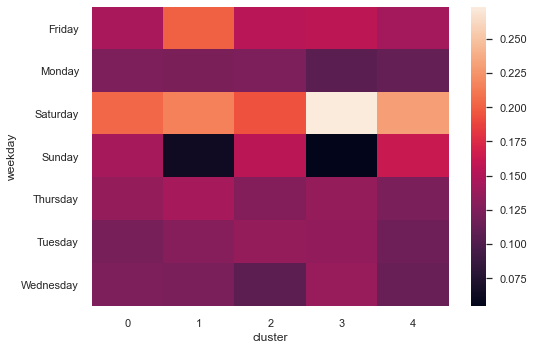

In [50]:
sns.heatmap(pd.crosstab(data.religion, data.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

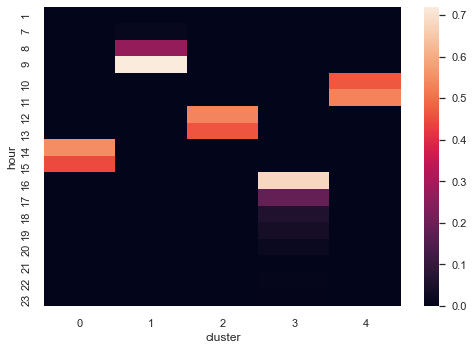

In [51]:
sns.heatmap(pd.crosstab(data.state, data.cluster, normalize='columns'))

In [52]:
clusters = data['cluster'].reset_index()
merged = pd.merge(durable, clusters, on='Transaction') #on a affecté les clusters à la grande table grace à merge
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           24
         Bread            13
         Tea               9
         Cake              7
         Sandwich          5
1        Coffee           29
         Bread            21
         Pastry            9
         Medialuna         6
         Tea               5
2        Coffee           23
         Bread            14
         Sandwich          7
         Tea               6
         NONE              6
3        Coffee           22
         Bread            13
         Tea               9
         Cake              8
         Hot chocolate     5
4        Coffee           30
         Bread            17
         Pastry            6
         Tea               6
         Medialuna         4
Name: Item, dtype: int32

# Last approach. Scale down + PCA + KMeans

In [53]:
df_ml.hour = df_ml.hour/24

In [54]:
pca = PCA(0.85)
pca.fit(df_ml.drop('cluster', axis = 1))
df_pca = pca.transform(df_ml.drop('cluster', axis = 1))

In [55]:
model = KMeans(5)
model.fit(df_pca)

KMeans(n_clusters=5)

In [56]:
df_ml.cluster = model.labels_
df_group.cluster = model.labels_

In [57]:
df_group.cluster.value_counts()

2    2818
0    2504
3    1798
1    1429
4     982
Name: cluster, dtype: int64

<AxesSubplot:xlabel='cluster', ylabel='weekday'>

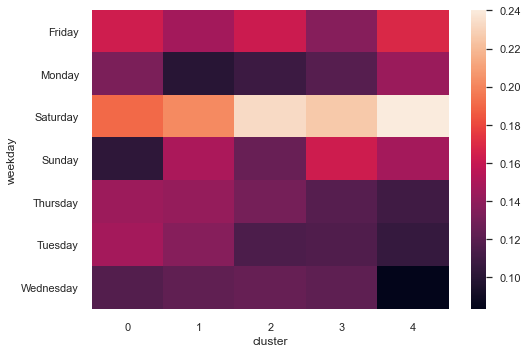

In [58]:
sns.heatmap(pd.crosstab(df_group.weekday, df_group.cluster, normalize='columns'))

<AxesSubplot:xlabel='cluster', ylabel='hour'>

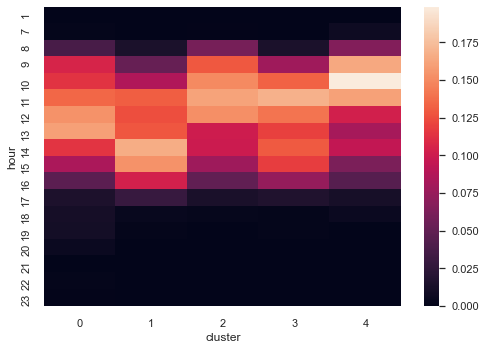

In [59]:
sns.heatmap(pd.crosstab(df_group.hour, df_group.cluster, normalize='columns'))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


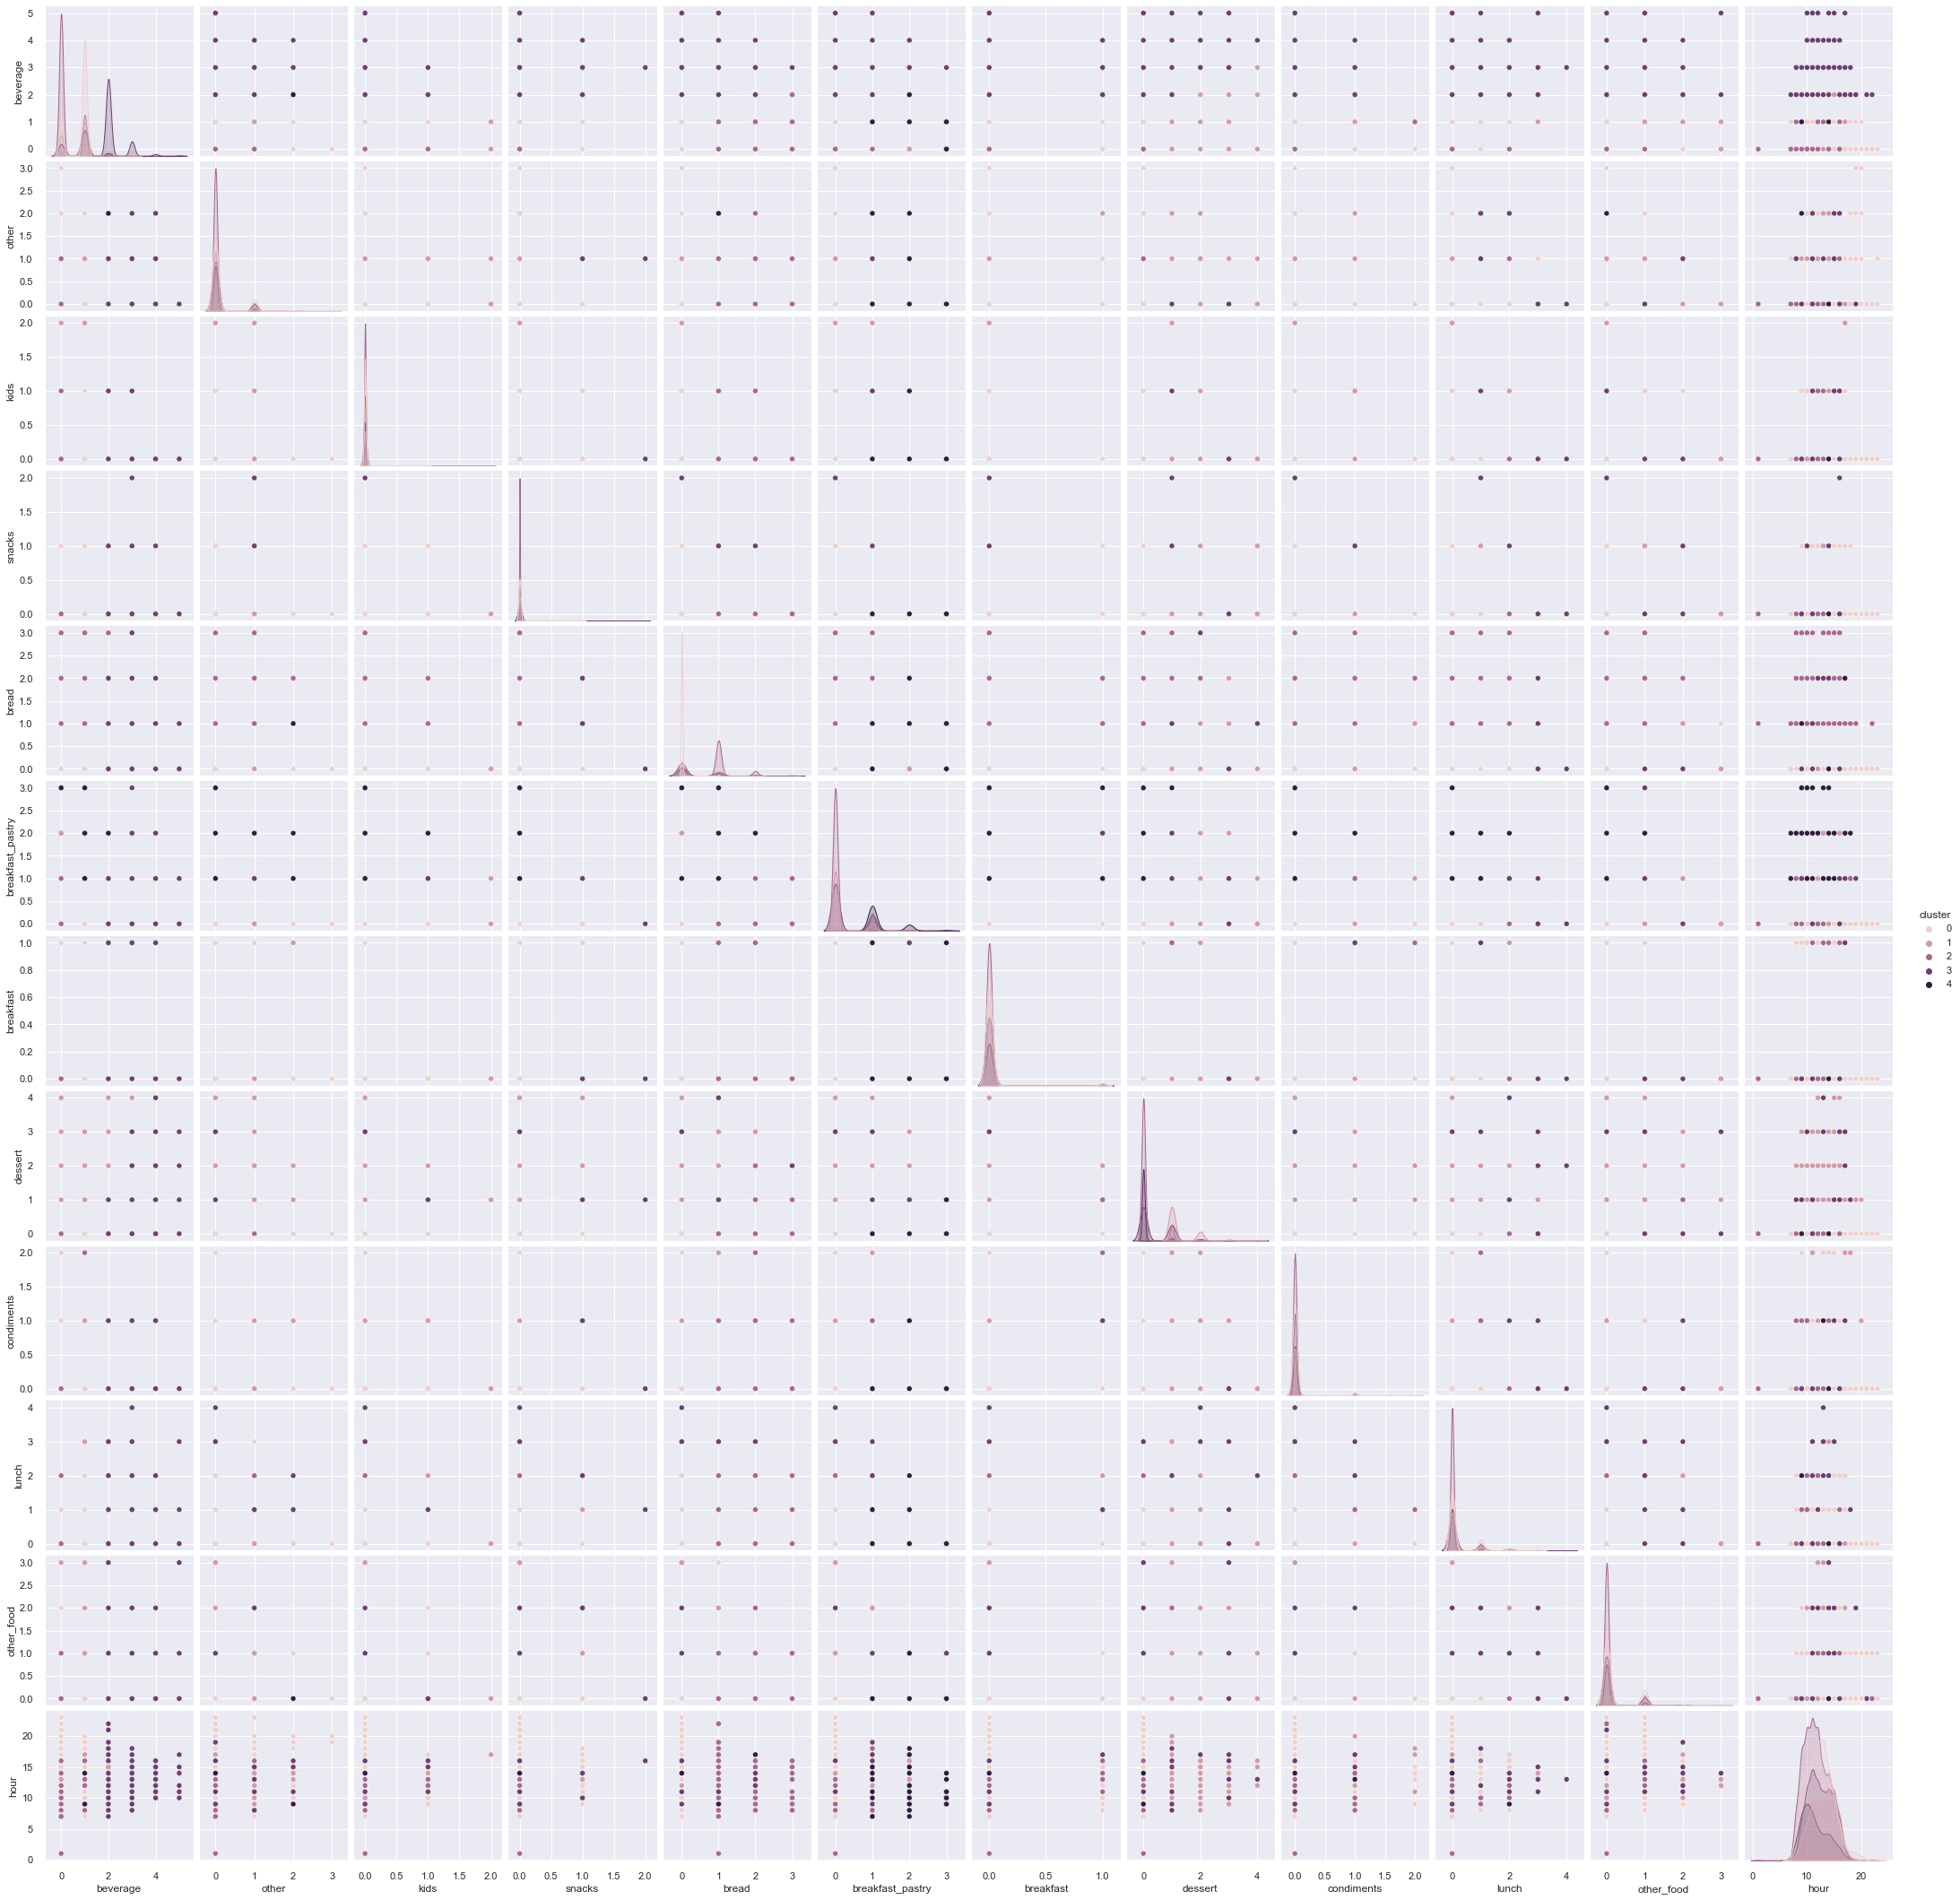

In [60]:
sns.pairplot(df_group, hue='cluster')

In [61]:
clusters = df_group['cluster'].reset_index()
merged = pd.merge(items, clusters, on='Transaction')
merged.groupby('cluster').Item.apply(lambda x: (x.value_counts(normalize=True).nlargest(5)*100).round()).astype(int)

cluster               
0        Coffee           39
         Tea               9
         Sandwich          8
         NONE              8
         Farm House        7
1        Cake             17
         Coffee           17
         Cookies           8
         Brownie           7
         Alfajores         6
2        Bread            51
         Coffee            9
         Scandinavian      5
         Toast             3
         Pastry            3
3        Coffee           37
         Tea              10
         Hot chocolate     6
         Bread             5
         Cake              4
4        Coffee           25
         Pastry           20
         Medialuna        16
         Muffin            8
         Bread             7
Name: Item, dtype: int32

# Evaluation

In [63]:
from sklearn.datasets import make_moons, make_blobs

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
X,y = make_blobs(random_state = 42)

In [66]:
X.shape

(100, 2)

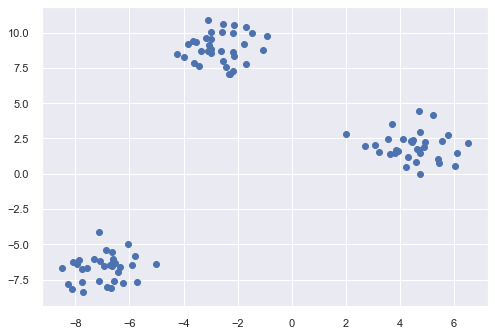

In [67]:
plt.scatter(X[:,0], X[:,1])

In [68]:
km = KMeans(3)
ac = AgglomerativeClustering(3)

In [69]:
km.fit(X)
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [70]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [71]:
km_labels = km.labels_
ac_labels = ac.labels_

In [72]:
print('Silhouette score for KMeans is', silhouette_score(X, km_labels))
print('Silhouette score for Agglomerative is', silhouette_score(X, ac_labels))

Silhouette score for KMeans is 0.8469881221532085
Silhouette score for Agglomerative is 0.8469881221532085


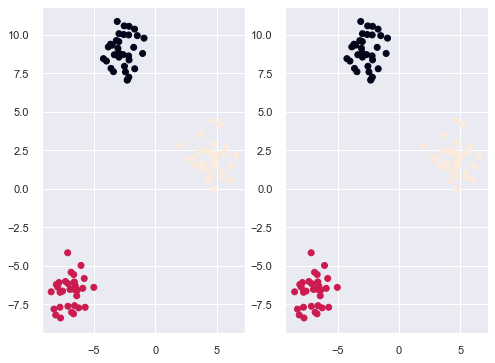

In [73]:
_, [ax1, ax2] = plt.subplots(1,2, figsize=(8,6))
ax1.scatter(X[:,0], X[:,1], c = km_labels)
ax2.scatter(X[:,0], X[:,1], c = ac_labels)

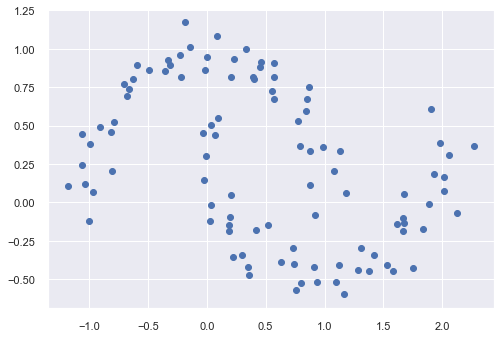

In [74]:
X,y = make_moons(random_state = 42, noise=0.1)
plt.scatter(X[:,0], X[:,1])

In [75]:
km = KMeans(2)
ac = AgglomerativeClustering(2, linkage='single')
km.fit(X)
ac.fit(X)
km_labels = km.labels_
ac_labels = ac.labels_

In [76]:
print('Silhouette score for KMeans is', silhouette_score(X, km_labels))
print('Silhouette score for Agglomerative is', silhouette_score(X, ac_labels))

Silhouette score for KMeans is 0.4767042663096479
Silhouette score for Agglomerative is 0.3075102992009324


In [77]:
print('Davies-Bouldin score for KMeans is', davies_bouldin_score(X, km_labels))
print('Davies-Bouldin for Agglomerative is', davies_bouldin_score(X, ac_labels))

Davies-Bouldin score for KMeans is 0.7835429631981143
Davies-Bouldin for Agglomerative is 1.1904671758172507


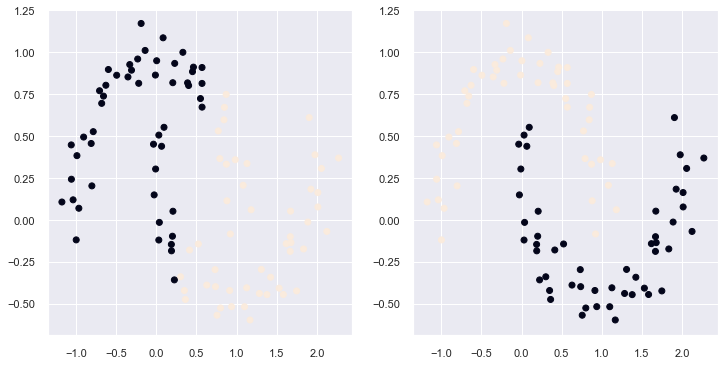

In [78]:
_, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))
ax1.scatter(X[:,0], X[:,1], c = km_labels)
ax2.scatter(X[:,0], X[:,1], c = ac_labels)